# Exercise 2 of Logisitic Regression - Medical Susceptible to Disease

## Importing the Python Modules

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Importing the Dataset

In [50]:
df = pd.read_excel('medical.xlsx')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Disease        36 non-null     object
 1   Age            36 non-null     int64 
 2   Gender         36 non-null     object
 3   Smoker status  36 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB


In [52]:
df.head()

,Disease,Age,Gender,Smoker status
0,diseased,43,Male,Smoker
1,not diseased,18,Male,Smoker
2,diseased,22,Female,Non-smoker
3,diseased,25,Male,Non-smoker
4,not diseased,45,Female,Smoker


## Convert category to numerical

In [53]:
label_encoder = LabelEncoder()
df['Disease'] = label_encoder.fit_transform(df['Disease'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Smoker status'] = label_encoder.fit_transform(df['Smoker status'])

df.head()

,Disease,Age,Gender,Smoker status
0,0,43,1,1
1,1,18,1,1
2,0,22,0,0
3,0,25,1,0
4,1,45,0,1


## Selecting the Features

In [54]:
feature_columns = ["Age", "Gender", "Smoker status"]
x = df[feature_columns]
y = df.Disease

## Splitting the Dataset 80:20

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(28, 3)

(28,)

(8, 3)

(8,)

## Train the model

In [56]:
model = LogisticRegression(max_iter=1000,solver="lbfgs")
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Testing the trained Model

In [57]:
y_pred = model.predict(x_test)

## Creating the Confusion Matrix and finding the accuracy of the model

In [58]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix :',conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score :',Accuracy_score)
print('Accuracy in Percentage:',int(Accuracy_score*100), '%' )

Confusion Matrix : [[4 0]
 [2 2]]
Accuracy Score : 0.75
Accuracy in Percentage: 75 %


## Generating the heatmap for confusion matrix

<Axes: xlabel='Predicted', ylabel='Actual'>

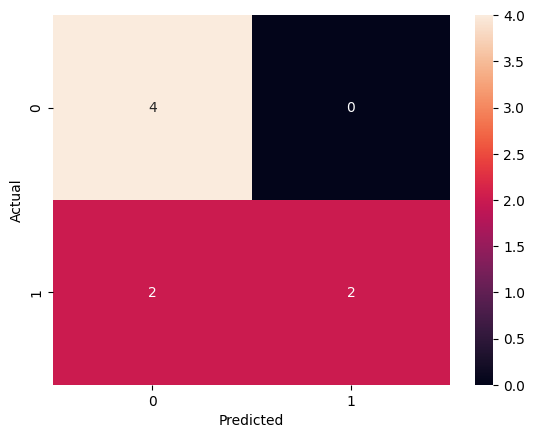

In [59]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True)